# Trabalho Final

**Aluno**: Heitor Vinicius de Paula Salatiel

**Matrícula**: 1185913



## 05 - Tratamento da base *experiencia_trabalho.csv*

A base "Experiência de Trabalho" possui 497 registros, distribuido em 5 diferentes colunas/informações a respeito da experiência de trabalho de cada profissional:
    1. Company : possui 2 tipos de informações em relação a empresa relacionada a experiência "Trojan Technologies" ou "Any Company". A maioria dos registros são "Any Company"
    2. Date: data da experiência
    3. Location:  Região, cidade ou país aonde o indivíduo teve determinada experiência profissional. São 71 localidades diferente, sendo a maioria são de Belo Horizonte.
    4. Position: Cargo ocupado. São 386 cargos diferentes, sendo que a maioria são Desenvolvedores de Softwares
    5. Perfil_id: ID de Idenficação dos Indivíduos

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

experiencia = pd.read_csv("bases/experiencia_trabalho.csv")

# Análise inicial
print("Nº de registros:", len(experiencia))
print("Nº de valores únicos de perfil_id:", experiencia.perfil_id.nunique())
print("Nº de valores únicos de company:", experiencia.company.nunique())
print("Nº de valores únicos de location:", experiencia.location.nunique())
print("Nº de valores únicos de position:", experiencia.position.nunique())
print("Nº de valores vazios de company:", experiencia.company.isnull().sum())
print("Nº de valores vazios de date:", experiencia.date.isnull().sum())
print("Nº de valores vazios de location:", experiencia.location.isnull().sum())
print("Nº de valores vazios de position:", experiencia.position.isnull().sum())

experiencia.describe(include="all")

Nº de registros: 497
Nº de valores únicos de perfil_id: 111
Nº de valores únicos de company: 2
Nº de valores únicos de location: 71
Nº de valores únicos de position: 386
Nº de valores vazios de company: 25
Nº de valores vazios de date: 26
Nº de valores vazios de location: 160
Nº de valores vazios de position: 25


,company,date,location,position,perfil_id
count,472,471,337,472,497.000000
unique,2,328,71,386,NaN
top,Any Company,mar de 2017 – o momento,"Belo Horizonte e Região, Brasil",Software Developer,NaN
freq,318,21,138,9,NaN
mean,NaN,NaN,NaN,NaN,54.187123
std,NaN,NaN,NaN,NaN,32.199717
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,27.000000
50%,NaN,NaN,NaN,NaN,54.000000
75%,NaN,NaN,NaN,NaN,81.000000


In [2]:
experiencia = experiencia[(experiencia.company.notnull()) & (experiencia.position.notnull()) & (experiencia.date.notnull())]
print("Nº de valores únicos de perfil_id:", experiencia.perfil_id.nunique())
print("Nº de registros restantes após remoção dos vazios:", len(experiencia))
print("Nº de valores vazios de company:", experiencia.company.isnull().sum())
print("Nº de valores vazios de date:", experiencia.date.isnull().sum())
print("Nº de valores vazios de location:", experiencia.location.isnull().sum())
print("Nº de valores vazios de position:", experiencia.position.isnull().sum())

Nº de valores únicos de perfil_id: 110
Nº de registros restantes após remoção dos vazios: 471
Nº de valores vazios de company: 0
Nº de valores vazios de date: 0
Nº de valores vazios de location: 134
Nº de valores vazios de position: 0


## 05.1 - Tratamento das data

A coluna **date** pode ser quebrada no ano de início (**inicio**) e no ano de fim (**fim**) da experiência. As experiências em aberto, possuem o texto "o momento" que será interpretado como o mês/ano da extração dos dados (09/2017). As experiências em aberto serão marcadas na coluna booleana **atual**, que indicando que o funcionário ainda trabalha na trojan.

In [3]:
def fromDateHandler(date):
    '''Extract the initial date from the date column'''
    months = np.array(["_","jan", "fev", "mar", "abr", "mai", "jun", "jul","ago","set", "out", "nov", "dez"])
    fromDate = str(date).split(" de ")
    if(len(fromDate) < 2):
        year = str(fromDate[0])
        result=year + "-1-1"
        return datetime.strptime(result, '%Y-%m-%d')
    else:
        year = str(fromDate[1]).strip()
        month, = np.where(months == str(fromDate[0]).strip())[0]
        result = year + "-" + str(month) + "-1"
        return datetime.strptime(result, '%Y-%m-%d')

In [4]:
def toDateHandler(date):
    '''Extract the final date from the date column'''
    months = np.array(["_","jan", "fev", "mar", "abr", "mai", "jun", "jul","ago","set", "out", "nov", "dez"])
    toDate = str(date).split(" de ")
    if(len(toDate) < 2):
        if(toDate[0].strip() == "o momento"):
            return datetime.now()
        year = str(toDate[0])
        result = year + "-1-1"
        return datetime.strptime(result, '%Y-%m-%d')
    else:
        year = str(toDate[1]).strip()
        month, = np.where(months == str(toDate[0]).strip())[0]
        result = year + "-" + str(month) + "-1"
        return datetime.strptime(result, '%Y-%m-%d')

In [5]:
def extractDate(row, fromDate):
    '''Extract a readable form of the column date'''
    dateStream = str(row).split(" – ")
    if(fromDate == True):
        fromDate = fromDateHandler(dateStream[0])
        return fromDate.date()
    else:
        toDate = toDateHandler(dateStream[1])
        return toDate.date()

In [6]:
experiencia["inicio"] = experiencia.date.apply(extractDate, args=(True,))
experiencia["fim"] = experiencia.date.apply(extractDate, args=(False,))

experiencia.head()

,company,date,location,position,perfil_id,inicio,fim
0,Trojan Technologies,set de 2011 – o momento,"Belo Horizonte e Região, Brasil",CEO and Founder,0,2011-09-01,2018-11-19
6,Any Company,mar de 2016 – o momento,NaN,Endeavor Entrepreneur,0,2016-03-01,2018-11-19
7,Any Company,out de 2015 – o momento,"Belo Horizonte e Região, Brasil",Investor and Board Member,0,2015-10-01,2018-11-19
8,Any Company,out de 2012 – mai de 2013,"Santiago, Chile",Start-Up Chile Entrepreneur,0,2012-10-01,2013-05-01
9,Any Company,set de 2009 – jan de 2011,"São Paulo e Região, Brasil",Founder and Sales Director,0,2009-09-01,2011-01-01


As experiências em aberto serão marcadas na coluna booleana atual, que indicando que o funcionário ainda trabalha na trojan.

In [7]:
atual_cond = experiencia['date'].str.contains('momento')
experiencia['atual'] = atual_cond

experiencia.head()

,company,date,location,position,perfil_id,inicio,fim,atual
0,Trojan Technologies,set de 2011 – o momento,"Belo Horizonte e Região, Brasil",CEO and Founder,0,2011-09-01,2018-11-19,True
6,Any Company,mar de 2016 – o momento,NaN,Endeavor Entrepreneur,0,2016-03-01,2018-11-19,True
7,Any Company,out de 2015 – o momento,"Belo Horizonte e Região, Brasil",Investor and Board Member,0,2015-10-01,2018-11-19,True
8,Any Company,out de 2012 – mai de 2013,"Santiago, Chile",Start-Up Chile Entrepreneur,0,2012-10-01,2013-05-01,False
9,Any Company,set de 2009 – jan de 2011,"São Paulo e Região, Brasil",Founder and Sales Director,0,2009-09-01,2011-01-01,False


A informação de duração da experiência (**duracao**) é derivada calculando a diferença do fim ao início em meses.

In [8]:
# calcula a duração estimada de cada experiência em meses
experiencia["duracao"] = experiencia.apply(lambda row: (row["fim"]-row["inicio"]).days / (30),axis=1)
experiencia.head()

,company,date,location,position,perfil_id,inicio,fim,atual,duracao
0,Trojan Technologies,set de 2011 – o momento,"Belo Horizonte e Região, Brasil",CEO and Founder,0,2011-09-01,2018-11-19,True,87.866667
6,Any Company,mar de 2016 – o momento,NaN,Endeavor Entrepreneur,0,2016-03-01,2018-11-19,True,33.100000
7,Any Company,out de 2015 – o momento,"Belo Horizonte e Região, Brasil",Investor and Board Member,0,2015-10-01,2018-11-19,True,38.166667
8,Any Company,out de 2012 – mai de 2013,"Santiago, Chile",Start-Up Chile Entrepreneur,0,2012-10-01,2013-05-01,False,7.066667
9,Any Company,set de 2009 – jan de 2011,"São Paulo e Região, Brasil",Founder and Sales Director,0,2009-09-01,2011-01-01,False,16.233333


É necessário uma edição manual sobre a coluna location. Há varias informações repetidas, porém com nomes diferentes (por exemplo "Belo Horizonte, Minas Gerais" e "Belo Horizonte/MG").

In [9]:
experiencia["location"].replace("Belo Horizonte e Região, Brasil","Belo Horizonte/MG-Brazil", inplace=True)
experiencia["location"].replace("Belo Horizonte, Minas Gerais","Belo Horizonte/MG-Brazil", inplace=True)
experiencia["location"].replace("Belo Horizonte Area, Brazil","Belo Horizonte/MG-Brazil", inplace=True)
experiencia["location"].replace("Belo Horizonte/MG","Belo Horizonte/MG-Brazil", inplace=True)
experiencia["location"].replace("Belo Horizonte","Belo Horizonte/MG-Brazil", inplace=True)
experiencia["location"].replace("belo horizonte","Belo Horizonte/MG-Brazil", inplace=True)
experiencia["location"].replace("BeloHorizonte","Belo Horizonte/MG-Brazil", inplace=True)
experiencia["location"].replace("1 Bootcamp Gama Academy - Belo Horizonte","Belo Horizonte/MG-Brazil", inplace=True)
experiencia["location"].replace("Avenida Antônio Carlos, 6627, Sala 14 (FAFICH - UFMG)","Belo Horizonte/MG-Brazil", inplace=True)
experiencia["location"].replace("Belo Horizonte, Minas Gerais, Brazil","Belo Horizonte/MG-Brazil", inplace=True)
experiencia["location"].replace("Belo Horizonte, Minas Gerais, Brésil","Belo Horizonte/MG-Brazil", inplace=True)

experiencia["location"].replace("São Paulo e Região, Brasil","São Paulo/SP-Brazil", inplace=True)
experiencia["location"].replace("São paulo","São Paulo/SP-Brazil", inplace=True)
experiencia["location"].replace("São Paulo, Brazil","São Paulo/SP-Brazil", inplace=True)
experiencia["location"].replace("São Paulo Area, Brazil","São Paulo/SP-Brazil", inplace=True)
experiencia["location"].replace("São Paulo, São Paulo","São Paulo/SP-Brazil", inplace=True)
experiencia["location"].replace("São Paulo","São Paulo/SP-Brazil", inplace=True)
experiencia["location"].replace("Alphaville-Barueri,SP","Barueri/SP-Brazil", inplace=True)
experiencia["location"].replace("Alphaville-Barueri-SP","Barueri/SP-Brazil", inplace=True)
experiencia["location"].replace("São Bernardo do Campo","São Bernardo do Campo/SP-Brazil", inplace=True)
experiencia["location"].replace("Santo André","Santo André/SP-Brazil", inplace=True)

experiencia["location"].replace("Irlanda","Dublin-Irlanda", inplace=True)

experiencia["location"].replace("Curitiba e Região, Brasil","Curitiba/PR-Brazil", inplace=True)

experiencia["location"].replace("Contagem","Contagem/MG-Brazil", inplace=True)
experiencia["location"].replace("Contagem e Região, Brasil","Contagem/MG-Brazil", inplace=True)

experiencia["location"].replace("Governador Valadares e Região, Brasil","Governador Valadares/MG-Brazil", inplace=True)

experiencia["location"].replace("Nova Lima/MG","Nova Lima/MG-Brazil", inplace=True)

experiencia["location"].replace("Ouro Preto e Região, Brasil","Ouro Preto/MG-Brazil", inplace=True)

experiencia["location"].replace("Manaus e Região, Brasil","Manaus/AM-Brazil", inplace=True)
experiencia["location"].replace("Manaus Area, Brazil","Manaus/AM-Brazil", inplace=True)
experiencia["location"].replace("Manaus","Manaus/AM-Brazil", inplace=True)
experiencia["location"].replace("Manaus, Amazonas","Manaus/AM-Brazil", inplace=True)
experiencia["location"].replace("Av. Efigênio Salles, 1155 - Aleixo, Manaus - AM, 69057-050","Manaus/AM-Brazil", inplace=True)
experiencia["location"].replace("Av. Brasil, Nº 2971 - Compensa - Cep – 69036-110","Manaus/AM-Brazil", inplace=True)
experiencia["location"].replace("Vieiralves","Vieiralves/AM-Brazil", inplace=True)

experiencia["location"].replace("Juiz de Fora e Região, Brasil","Juiz de Fora/MG-Brazil", inplace=True)

experiencia["location"].replace("Rio de Janeiro Area, Brazil","Rio de Janeiro/RJ-Brazil", inplace=True)
experiencia["location"].replace("Rio de Janeiro e Região, Brasil","Rio de Janeiro/RJ-Brazil", inplace=True)
experiencia["location"].replace("RIo de Janeiro","Rio de Janeiro/RJ-Brazil", inplace=True)

experiencia["location"].replace("Recife e Região, Brasil","Recife/PE-Brazil", inplace=True)

experiencia["location"].replace("Amesterdã e Região, Holanda","Amesterdã-Holanda", inplace=True)

experiencia["location"].replace("Vitória e Região, Brasil","Vitória/ES-Brazil", inplace=True)

experiencia["location"].replace("Sydney e Região, Austrália","Sydney-Austrália", inplace=True)

experiencia["location"].replace("Mountain View, California","Mountain View/CA-United State", inplace=True)
experiencia["location"].replace("West Palm Beach, Florida Area","West Palm Beach/FL-United State", inplace=True)
experiencia["location"].replace("Aulnoye-Aymeries, France","Aulnoye Aymeries-France", inplace=True)

experiencia["location"].replace("Florianópolis","Florianópolis/SC-Brazil", inplace=True)
experiencia["location"].replace("Santa Catarina - Balneário Camboriú","Balneário Camboriú/SC-Brazil", inplace=True)

experiencia["location"].replace("Brasília e Região, Brasil","Brasília/DF-Brazil", inplace=True)
experiencia["location"].replace("Brasília","Brasília/DF-Brazil", inplace=True)

experiencia["location"].replace("Porto Alegre, Rio Grande do Sul","Porto Alegre/RS-Brazil", inplace=True)
experiencia["location"].replace("Rio Grande do Sul","Porto Alegre/RS-Brazil", inplace=True)
experiencia["location"].replace("Porto Alegre e Região, Brasil","Porto Alegre/RS-Brazil", inplace=True)
experiencia["location"].replace("Alvorada","Alvorada/RS-Brazil", inplace=True)

experiencia["location"].replace("Belém, PA","Belém/PA-Brazil", inplace=True)

experiencia["location"].replace("Varginha e Região, Brasil","Varginha/MG-Brazil", inplace=True)
experiencia["location"].replace("Itabira, Minas Gerais","Itabira/MG-Brazil", inplace=True)
experiencia["location"].replace("Betim e Região, Brasil","Betim/MG-Brazil", inplace=True)
experiencia["location"].replace("Três Corações e Região, Brasil","Três Corações/MG-Brazil", inplace=True)


experiencia["location"].replace("Dourados e Região, Brasil","Dourados/MS-Brazil", inplace=True)

experiencia.location.unique()

array(['Belo Horizonte/MG-Brazil', nan, 'Santiago, Chile',
       'São Paulo/SP-Brazil', 'Nova Lima/MG-Brazil',
       'Governador Valadares/MG-Brazil', 'Curitiba/PR-Brazil',
       'Dublin-Irlanda', 'Contagem/MG-Brazil', 'Manaus/AM-Brazil',
       'Juiz de Fora/MG-Brazil', 'Rio de Janeiro/RJ-Brazil',
       'Recife/PE-Brazil', 'Amesterdã-Holanda', 'Vitória/ES-Brazil',
       'Sydney-Austrália', 'Mountain View/CA-United State',
       'Florianópolis/SC-Brazil',
       'Universidade Federal de Santa Catarina', 'Ouro Preto/MG-Brazil',
       'Elogia', 'Betim/MG-Brazil', 'Itabira/MG-Brazil',
       'Campinas e Região, Brasil', 'Chile/Brasil', 'Varginha/MG-Brazil',
       'Belém/PA-Brazil', 'Três Corações/MG-Brazil',
       'São Paulo e Belo Horizonte',
       'Rio de Janeiro and São Paulo Area, Brazil', 'Icomp', 'Brazil',
       'Alvorada/RS-Brazil', 'Vieiralves/AM-Brazil', 'Barueri/SP-Brazil',
       'Aulnoye Aymeries-France', 'Santo André/SP-Brazil',
       'Dourados/MS-Brazil', 'São Be

Algumas informações consolidadas por funcionários podem ser extraídas dessa base. É possível extrair o tempo de carreira na empresa em meses (**tempo_empresa_meses**), o tempo de carreira no mercado em geral em meses (**tempo_mercado_meses**), e também a quantidade de empregos que o funcionário já teve (**qtd_empregos**), o que pode auxiliar em algo na análise. Portanto, obtenha essas informações.

In [10]:
perfis = experiencia.perfil_id.unique()
qtd_jobs = []
for perfil in perfis:
    selected_perfis = experiencia[experiencia.perfil_id==perfil]
    qtd_jobs.append(selected_perfis.perfil_id.count())
np.array(qtd_jobs).shape

(110,)

In [11]:
experiencia['duracao_emp'] = experiencia["duracao"]
experiencia_group = experiencia.groupby('perfil_id').agg({
    'company':'first',
    'date':'first',
    'location':'first',
    'position':'first',
    'inicio':'first',
    'fim':'first',
    'duracao':'sum',
    'duracao_emp':'first',
    'atual':'first'
}).reset_index()
experiencia.drop(['duracao_emp'], axis=1, inplace=True)
experiencia_group.head()

,perfil_id,company,date,location,position,inicio,fim,duracao,duracao_emp,atual
0,0,Trojan Technologies,set de 2011 – o momento,Belo Horizonte/MG-Brazil,CEO and Founder,2011-09-01,2018-11-19,182.433333,87.866667,True
1,1,Trojan Technologies,jul de 2017 – o momento,Belo Horizonte/MG-Brazil,Product Manager,2017-07-01,2018-11-19,53.966667,16.866667,True
2,2,Any Company,jul de 2017 – o momento,Belo Horizonte/MG-Brazil,JavaScript Software Architect,2017-07-01,2018-11-19,87.100000,16.866667,True
3,3,Trojan Technologies,ago de 2017 – o momento,Belo Horizonte/MG-Brazil,CRM Analyst,2017-08-01,2018-11-19,25.933333,15.833333,True
4,4,Trojan Technologies,mar de 2017 – o momento,Belo Horizonte/MG-Brazil,Sales Operations Coordinator,2017-03-01,2018-11-19,27.066667,20.933333,True


In [12]:
exp_trabalho = pd.concat([experiencia_group,pd.Series(qtd_jobs).rename('qtd_jobs')],axis=1)
exp_trabalho.head()

,perfil_id,company,date,location,position,inicio,fim,duracao,duracao_emp,atual,qtd_jobs
0,0,Trojan Technologies,set de 2011 – o momento,Belo Horizonte/MG-Brazil,CEO and Founder,2011-09-01,2018-11-19,182.433333,87.866667,True,5
1,1,Trojan Technologies,jul de 2017 – o momento,Belo Horizonte/MG-Brazil,Product Manager,2017-07-01,2018-11-19,53.966667,16.866667,True,5
2,2,Any Company,jul de 2017 – o momento,Belo Horizonte/MG-Brazil,JavaScript Software Architect,2017-07-01,2018-11-19,87.100000,16.866667,True,5
3,3,Trojan Technologies,ago de 2017 – o momento,Belo Horizonte/MG-Brazil,CRM Analyst,2017-08-01,2018-11-19,25.933333,15.833333,True,3
4,4,Trojan Technologies,mar de 2017 – o momento,Belo Horizonte/MG-Brazil,Sales Operations Coordinator,2017-03-01,2018-11-19,27.066667,20.933333,True,5


## 05.2 - Cargo atual na empresa


In [13]:
exp_trabalho.head()

,perfil_id,company,date,location,position,inicio,fim,duracao,duracao_emp,atual,qtd_jobs
0,0,Trojan Technologies,set de 2011 – o momento,Belo Horizonte/MG-Brazil,CEO and Founder,2011-09-01,2018-11-19,182.433333,87.866667,True,5
1,1,Trojan Technologies,jul de 2017 – o momento,Belo Horizonte/MG-Brazil,Product Manager,2017-07-01,2018-11-19,53.966667,16.866667,True,5
2,2,Any Company,jul de 2017 – o momento,Belo Horizonte/MG-Brazil,JavaScript Software Architect,2017-07-01,2018-11-19,87.100000,16.866667,True,5
3,3,Trojan Technologies,ago de 2017 – o momento,Belo Horizonte/MG-Brazil,CRM Analyst,2017-08-01,2018-11-19,25.933333,15.833333,True,3
4,4,Trojan Technologies,mar de 2017 – o momento,Belo Horizonte/MG-Brazil,Sales Operations Coordinator,2017-03-01,2018-11-19,27.066667,20.933333,True,5


## 05.3 - Setor do Funcionário na empresa

A partir da posicao dos funcionários, é possível descobrir (ou inferir) o setor que eles trabalham.

In [14]:
exp_trabalho["area"] = exp_trabalho["position"].copy()

exp_trabalho["area"].replace("Gerente Regional Rio de Janeiro","General Management", inplace=True)
exp_trabalho["area"].replace("Coordenador / Coordinator","General Management", inplace=True)
exp_trabalho["area"].replace("Gerente Regional Sul","General Management", inplace=True)
exp_trabalho["area"].replace("Head Of Strategy","General Management", inplace=True)
exp_trabalho["area"].replace("Business Development Manager","General Management", inplace=True)
exp_trabalho["area"].replace("Onboarding Coordinator","General Management", inplace=True)

exp_trabalho["area"].replace("JavaScript Software Architect","IT", inplace=True)
exp_trabalho["area"].replace("Desenvolvedor Pleno I","IT", inplace=True)
exp_trabalho["area"].replace("Desenvolvedora de Software","IT", inplace=True)
exp_trabalho["area"].replace("Desenvolvedora","IT", inplace=True)
exp_trabalho["area"].replace("Desenvolvedora","IT", inplace=True)
exp_trabalho["area"].replace("Software Test Developer II","IT", inplace=True)
exp_trabalho["area"].replace("iOS Developer","IT", inplace=True)
exp_trabalho["area"].replace("Desenvolvedor Júnior","IT", inplace=True)
exp_trabalho["area"].replace("Software Developer","IT", inplace=True)
exp_trabalho["area"].replace("Desenvolvedor Junior","IT", inplace=True)
exp_trabalho["area"].replace("Desenvolvedor Jr","IT", inplace=True)
exp_trabalho["area"].replace("Lead Software Developer","IT", inplace=True)
exp_trabalho["area"].replace("Analista de tecnologia da informação","IT", inplace=True)
exp_trabalho["area"].replace("Software Architect","IT", inplace=True)

exp_trabalho["area"].replace("Full Stack Engineer","Engineering", inplace=True)
exp_trabalho["area"].replace("Engenheiro de software sênior","Engineering", inplace=True)
exp_trabalho["area"].replace("Engenheiro de Software","Engineering", inplace=True)
exp_trabalho["area"].replace("Arquiteto de soluções","Engineering", inplace=True)

exp_trabalho["area"].replace("Public Relations Intern","Intern", inplace=True)
exp_trabalho["area"].replace("Customer Success - Intern","Intern", inplace=True)
exp_trabalho["area"].replace("Estágiária","Intern", inplace=True)
exp_trabalho["area"].replace("Estagiária de Customer Success","Intern", inplace=True)
exp_trabalho["area"].replace("Aprediz administrativo","Intern", inplace=True)
exp_trabalho["area"].replace("Estagiária de CRM","Intern", inplace=True)
exp_trabalho["area"].replace("Estagiaria do Financeiro","Intern", inplace=True)
exp_trabalho["area"].replace("Estágio em Marketing CRM","Intern", inplace=True)

exp_trabalho["area"].replace("Trade Marketing Analyst","Marketing", inplace=True)
exp_trabalho["area"].replace("Especialista em Marketing de Performance","Marketing", inplace=True)
exp_trabalho["area"].replace("Equipe de Comunicação","Marketing", inplace=True)
exp_trabalho["area"].replace("Coordenadora de Branding","Marketing", inplace=True)
exp_trabalho["area"].replace("Director of Marketing","Marketing", inplace=True)
exp_trabalho["area"].replace("Analista de marketing","Marketing", inplace=True)
exp_trabalho["area"].replace("Coordenador de marketing","Marketing", inplace=True)
exp_trabalho["area"].replace("Trade Marketing","Marketing", inplace=True)

exp_trabalho["area"].replace("Diretora de arte","Design", inplace=True)
exp_trabalho["area"].replace("Head of Product Design - UXP","Design", inplace=True)
exp_trabalho["area"].replace("Lead Product Designer, Partner","Design", inplace=True)
exp_trabalho["area"].replace("Senior UX Designer","Design", inplace=True)

exp_trabalho["area"].replace("Commercial Analyst","Commercial", inplace=True)
exp_trabalho["area"].replace("Customer Sucess Analyst","Commercial", inplace=True)
exp_trabalho["area"].replace("Executivo de vendas","Commercial", inplace=True)
exp_trabalho["area"].replace("Executivo Comercial Senior","Commercial", inplace=True)
exp_trabalho["area"].replace("Coordenador Comercial","Commercial", inplace=True)
exp_trabalho["area"].replace("Head Of Commercial","Commercial", inplace=True)
exp_trabalho["area"].replace("Gerente comercial Sao Paulo","Commercial", inplace=True)
exp_trabalho["area"].replace("Gerente Comercial e Operações Regional Centro-Oeste","Commercial", inplace=True)
exp_trabalho["area"].replace("Sales Operations Manager","Commercial", inplace=True)
exp_trabalho["area"].replace("Commercial Manager","Commercial", inplace=True)
exp_trabalho["area"].replace("Customer Success","Commercial", inplace=True)
exp_trabalho["area"].replace("Sales Executive","Commercial", inplace=True)
exp_trabalho["area"].replace("Head Of Sales","Commercial", inplace=True)
exp_trabalho["area"].replace("Purchasing Analyst","Commercial", inplace=True)
exp_trabalho["area"].replace("Head of Customer Success","Commercial", inplace=True)
exp_trabalho["area"].replace("Sales Operations Analyst","Commercial", inplace=True)
exp_trabalho["area"].replace("Key Account","Commercial", inplace=True)
exp_trabalho["area"].replace("Key Account Manager","Commercial", inplace=True)
exp_trabalho["area"].replace("Sales Operations Coordinator","Commercial", inplace=True)
exp_trabalho["area"].replace("CRM Analyst","Commercial", inplace=True)
exp_trabalho["area"].replace("Inside Sales","Commercial", inplace=True)
exp_trabalho["area"].replace("Costomer Success","Commercial", inplace=True)
exp_trabalho["area"].replace("Analista de Atendimento","Commercial", inplace=True)

exp_trabalho["area"].replace("Founder and CFO","CEO and Founder", inplace=True)
exp_trabalho["area"].replace("Co-founder & CTO | Brazil","CEO and Founder", inplace=True)
exp_trabalho["area"].replace("Co-idealizador e Anfitrião","CEO and Founder", inplace=True)
exp_trabalho["area"].replace("COO","CEO and Founder", inplace=True)

exp_trabalho["area"].replace("Talent Acquisition","RH", inplace=True)
exp_trabalho["area"].replace("Gerente de Relacionamento","RH", inplace=True)
exp_trabalho["area"].replace("Gerente de Estágios Profissionais Corporativos","RH", inplace=True)
exp_trabalho["area"].replace("Head of People","RH", inplace=True)
exp_trabalho["area"].replace("Gestora do time de Pessoas - Responsável por R&S e T&D","RH", inplace=True)
exp_trabalho["area"].replace("People Consultant","RH", inplace=True)

exp_trabalho["area"].replace("Finance Director","Financial", inplace=True)
exp_trabalho["area"].replace("Analista financeiro","Financial", inplace=True)
exp_trabalho["area"].replace("Executiva de Contas","Financial", inplace=True)
exp_trabalho["area"].replace("Analista Financeiro","Financial", inplace=True)
exp_trabalho["area"].replace("Analista de controladoria","Financial", inplace=True)

exp_trabalho["area"].replace("Product Manager","Quality", inplace=True)
exp_trabalho["area"].replace("Auxiliar técnico de qualidade 1","Quality", inplace=True)
exp_trabalho["area"].replace("Gestora de Contas e Assessora de Qualidade","Quality", inplace=True)
exp_trabalho["area"].replace("Product Growth Manager","Quality", inplace=True)
exp_trabalho["area"].replace("Business Developer + Product Manager","Quality", inplace=True)

exp_trabalho["area"].replace("Gerente de operações","Operational", inplace=True)
exp_trabalho["area"].replace("Head of In-Store Operation","Operational", inplace=True)
exp_trabalho["area"].replace("Operações ERP","Operational", inplace=True)
exp_trabalho["area"].replace("Head of Trojan Technologies In-Store", inplace=True)

exp_trabalho["area"].replace("Software Engineer and Data Scientist","Data Science", inplace=True)
exp_trabalho["area"].replace("Data Engineer BI and Data Analyst","Data Science", inplace=True)
exp_trabalho["area"].replace("Business Intelligence and Data Analyst","Data Science", inplace=True)
exp_trabalho["area"].replace("Head of Data Analytics","Data Science", inplace=True)

exp_trabalho["area"].replace("English Teacher","Education", inplace=True)

exp_trabalho["area"].replace("Coordenadora de CS","Others", inplace=True)
exp_trabalho["area"].replace("Tech Leader","Others", inplace=True)
exp_trabalho["area"].replace("Analista de DP","Others", inplace=True)
exp_trabalho["area"].replace("Time de Expansão Local","Others", inplace=True)
exp_trabalho["area"].replace("Time de Expansão","Others", inplace=True)

exp_trabalho.area.unique()

array(['CEO and Founder', 'Quality', 'IT', 'Commercial', 'Data Science',
       'Intern', 'Operational', 'RH', 'Marketing', 'Others',
       'General Management', 'Design', 'Engineering', 'Financial',
       'Education', 'Writer'], dtype=object)

In [15]:
exp_trabalho.head()

,perfil_id,company,date,location,position,inicio,fim,duracao,duracao_emp,atual,qtd_jobs,area
0,0,Trojan Technologies,set de 2011 – o momento,Belo Horizonte/MG-Brazil,CEO and Founder,2011-09-01,2018-11-19,182.433333,87.866667,True,5,CEO and Founder
1,1,Trojan Technologies,jul de 2017 – o momento,Belo Horizonte/MG-Brazil,Product Manager,2017-07-01,2018-11-19,53.966667,16.866667,True,5,Quality
2,2,Any Company,jul de 2017 – o momento,Belo Horizonte/MG-Brazil,JavaScript Software Architect,2017-07-01,2018-11-19,87.100000,16.866667,True,5,IT
3,3,Trojan Technologies,ago de 2017 – o momento,Belo Horizonte/MG-Brazil,CRM Analyst,2017-08-01,2018-11-19,25.933333,15.833333,True,3,Commercial
4,4,Trojan Technologies,mar de 2017 – o momento,Belo Horizonte/MG-Brazil,Sales Operations Coordinator,2017-03-01,2018-11-19,27.066667,20.933333,True,5,Commercial


#### Analisando o quadro abaixo é possível ver que há 16 diferentes áreas na empresa e que a mesma possui maior número de efetivos pertencem à area comercial.

In [16]:
exp_trabalho.area.isnull().value_counts()

False    110
Name: area, dtype: int64

In [17]:
exp_trabalho.describe(include='all')

,perfil_id,company,date,location,position,inicio,fim,duracao,duracao_emp,atual,qtd_jobs,area
count,110.000000,110,110,104,110,110,110,110.000000,110.000000,110,110.000000,110
unique,NaN,2,27,10,93,26,1,NaN,NaN,1,NaN,16
top,NaN,Trojan Technologies,mar de 2017 – o momento,Belo Horizonte/MG-Brazil,Software Developer,2017-03-01,2018-11-19,NaN,NaN,True,NaN,Commercial
freq,NaN,106,18,76,5,18,110,NaN,NaN,110,NaN,29
mean,54.518182,NaN,NaN,NaN,NaN,NaN,NaN,91.960909,25.738182,NaN,4.281818,NaN
std,31.929605,NaN,NaN,NaN,NaN,NaN,NaN,54.674594,13.396008,NaN,1.158390,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,20.933333,14.800000,NaN,1.000000,NaN
25%,27.250000,NaN,NaN,NaN,NaN,NaN,NaN,50.341667,18.900000,NaN,4.000000,NaN
50%,54.500000,NaN,NaN,NaN,NaN,NaN,NaN,77.666667,21.866667,NaN,5.000000,NaN
75%,81.750000,NaN,NaN,NaN,NaN,NaN,NaN,115.983333,25.966667,NaN,5.000000,NaN


Ao analisar a coluna duration_exp é possível verificar que os indivíduos possuem em média 94.30 meses (cerca de 8 anos) de experiência no mercado de trabalho. Plotando-se um histograma dessa variável, com largura de 30 dias (1 mes) é possível ter uma idéia acerca da distribuição desta variável. Além disso, plotou-se 6 retas verticais, com a média e o intervalo de até 3Sigmas.

In [18]:
plot_exp = exp_trabalho.dropna()
plot_exp.describe()

,perfil_id,duracao,duracao_emp,qtd_jobs
count,104.000000,104.000000,104.000000,104.000000
mean,54.394231,94.346154,25.783974,4.365385
std,31.843494,55.176724,13.478206,1.061760
min,0.000000,20.933333,14.800000,1.000000
25%,27.750000,53.066667,18.900000,4.000000
50%,53.500000,79.300000,21.866667,5.000000
75%,82.250000,118.791667,25.966667,5.000000
max,109.000000,293.400000,95.966667,5.000000


In [19]:
from plotnine import*
mean = 94.30
std = 55.16
text_shift = 8

(ggplot(plot_exp,aes(x='duracao',fill='area')) + 
geom_histogram(binwidth=30) +
geom_vline(xintercept=mean) +
geom_vline(xintercept=(mean - std),linetype='dashed') +
geom_vline(xintercept=(mean - 2*std),linetype='dashed') +
geom_vline(xintercept=(mean + std),linetype='dashed') +
geom_vline(xintercept=(mean + 2*std),linetype='dashed') +
geom_vline(xintercept=(mean + 3*std),linetype='dashed') +
labs(title = "Histograma Tempo de Experiência Total", subtitle = "Análise gráfica para ver qual área possui maior qualificação por experiência no mercado de trabalho") +
ylab("Quantidade de Indivíduos") + 
xlab("Tempo (meses)")+
geom_text(x=mean - text_shift , label="MEAN", y=10, angle=90,colour="red") +
geom_text(x=mean - std - text_shift, label="-1X STD", y=10, angle=90,colour="blue") +
geom_text(x=mean - 2*std - text_shift, label="-2X STD", y=10, angle=90,colour="green") +
geom_text(x=mean + std - text_shift, label="+1X STD", y=10, angle=90,colour="blue") + 
geom_text(x=mean + 2*std - text_shift, label="+2X STD", y=10, angle=90,colour="green")+
geom_text(x=mean + 3*std - text_shift, label="+3X STD", y=10, angle=90,colour="black")
)

<Figure size 640x480 with 1 Axes>

<ggplot: (21799079)>

Pelo gráfico abaixo é possível ver que os indivíduos de CEO and Founder, Ciência de Dados e Design tendem a possuir maior tempo de mercado quando comparado com as outras áreas. Porém há uma pequena quantidade dos mesmos quando comparado com outras áreas (comercial, por exemplo).

c:\users\heitor salatiel\appdata\local\programs\python\python37-32\lib\site-packages\plotnine\stats\stat.py:310: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


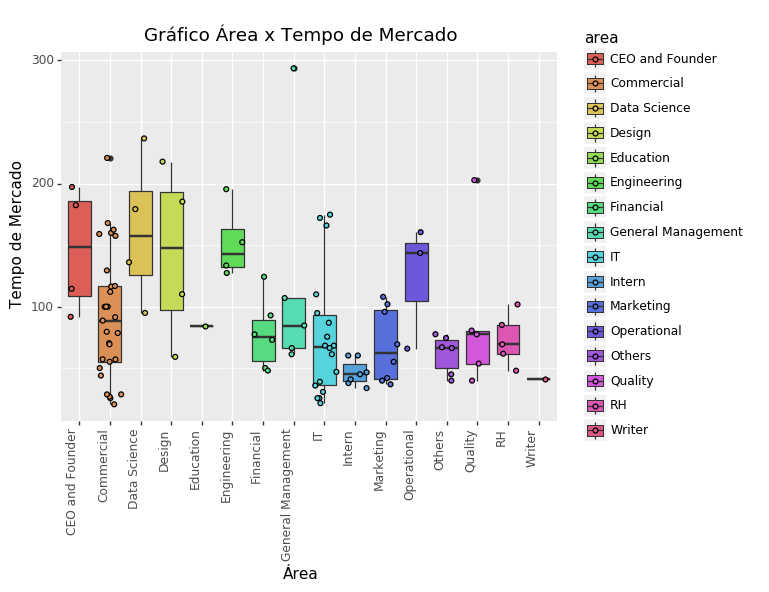

<ggplot: (22918041)>

In [20]:
(ggplot(exp_trabalho, aes(x='area',
                 y='duracao',
                 fill='area')) + 
geom_boxplot(notch=False) +
geom_jitter() + 
theme(axis_text_x  = element_text(angle = 90, hjust = 1)) + 
labs(title = "Gráfico Área x Tempo de Mercado", subtitle = "Análise gráfica para ver qual área possui maior qualificação por experiência no mercado de trabalho") +
ylab("Tempo de Mercado") + 
xlab("Área"))

Ao invés de analisar o tempo médio de mercado entre todas as áreas, devido a grande diferença de indivíduos presente em cada área, é pertinente fazer uma análise do tempo médio de mercado por área

In [21]:
mean_area_dic = []
areas = exp_trabalho.area.dropna().unique()
for area in areas:
    cond = exp_trabalho.area == area
    selected_area = exp_trabalho[cond]
    register = {'area':area,'mean': (selected_area.duracao.sum() / selected_area.area.count())}
    mean_area_dic.append(register)
area_time_avg = pd.DataFrame(mean_area_dic)
area_time_avg.head()

,area,mean
0,CEO and Founder,146.541667
1,Quality,91.060000
2,IT,76.298148
3,Commercial,92.383908
4,Data Science,161.750000


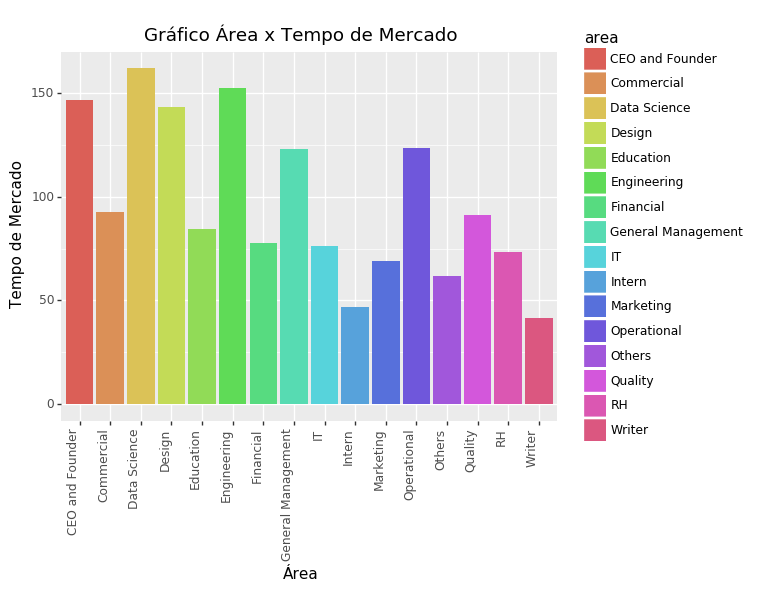

<ggplot: (23056363)>

In [22]:
(ggplot(area_time_avg, aes(x='area',
                 y='mean',
                 fill='area')) + 
geom_bar(stat='identity') +
theme(axis_text_x  = element_text(angle = 90, hjust = 1)) + 
labs(title = "Gráfico Área x Tempo de Mercado", subtitle = "Análise gráfica para ver qual área possui maior qualificação por experiência no mercado de trabalho") +
ylab("Tempo de Mercado") + 
xlab("Área"))

## 05.4 Salvando Base Tratada

A base tratada será gravada no arquivo **experiencia_trabalho-tratado.csv**.

As informações consolidadas por perfil serão gravadas na base **perfil-experiencia,csv** contendo as colunas: **perfil_id**, **posicao_atual**, **data_admissao**, **departamento**, **tempo_empresa_meses**, **tempo_mercado_meses**, **qtd_empregos**.

In [23]:
experiencia.head()

,company,date,location,position,perfil_id,inicio,fim,atual,duracao
0,Trojan Technologies,set de 2011 – o momento,Belo Horizonte/MG-Brazil,CEO and Founder,0,2011-09-01,2018-11-19,True,87.866667
6,Any Company,mar de 2016 – o momento,NaN,Endeavor Entrepreneur,0,2016-03-01,2018-11-19,True,33.100000
7,Any Company,out de 2015 – o momento,Belo Horizonte/MG-Brazil,Investor and Board Member,0,2015-10-01,2018-11-19,True,38.166667
8,Any Company,out de 2012 – mai de 2013,"Santiago, Chile",Start-Up Chile Entrepreneur,0,2012-10-01,2013-05-01,False,7.066667
9,Any Company,set de 2009 – jan de 2011,São Paulo/SP-Brazil,Founder and Sales Director,0,2009-09-01,2011-01-01,False,16.233333


In [24]:
exp_trabalho.head()

,perfil_id,company,date,location,position,inicio,fim,duracao,duracao_emp,atual,qtd_jobs,area
0,0,Trojan Technologies,set de 2011 – o momento,Belo Horizonte/MG-Brazil,CEO and Founder,2011-09-01,2018-11-19,182.433333,87.866667,True,5,CEO and Founder
1,1,Trojan Technologies,jul de 2017 – o momento,Belo Horizonte/MG-Brazil,Product Manager,2017-07-01,2018-11-19,53.966667,16.866667,True,5,Quality
2,2,Any Company,jul de 2017 – o momento,Belo Horizonte/MG-Brazil,JavaScript Software Architect,2017-07-01,2018-11-19,87.100000,16.866667,True,5,IT
3,3,Trojan Technologies,ago de 2017 – o momento,Belo Horizonte/MG-Brazil,CRM Analyst,2017-08-01,2018-11-19,25.933333,15.833333,True,3,Commercial
4,4,Trojan Technologies,mar de 2017 – o momento,Belo Horizonte/MG-Brazil,Sales Operations Coordinator,2017-03-01,2018-11-19,27.066667,20.933333,True,5,Commercial


In [25]:
perfil_exp = pd.concat([exp_trabalho.perfil_id,exp_trabalho.position,exp_trabalho.inicio,exp_trabalho.area,\
                        exp_trabalho.duracao_emp,exp_trabalho.duracao,exp_trabalho.qtd_jobs],axis=1)
perfil_exp.set_index('perfil_id', inplace=True)
perfil_exp.head()

,position,inicio,area,duracao_emp,duracao,qtd_jobs
perfil_id,,,,,,
0,CEO and Founder,2011-09-01,CEO and Founder,87.866667,182.433333,5
1,Product Manager,2017-07-01,Quality,16.866667,53.966667,5
2,JavaScript Software Architect,2017-07-01,IT,16.866667,87.100000,5
3,CRM Analyst,2017-08-01,Commercial,15.833333,25.933333,3
4,Sales Operations Coordinator,2017-03-01,Commercial,20.933333,27.066667,5


In [26]:
# Grava um csv tratado
experiencia.to_csv('bases/experiencia-tratado.csv')

perfil_exp.to_csv('bases/perfil-experiencia.csv')

### Navegação:
* [Voltar para a análise](00-analise-dos-dados.ipynb)